# Guided Project[Statistics]: Finding the Best Markets to Advertise in

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey.

https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969

freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this GitHub repository: https://github.com/freeCodeCamp/2017-new-coder-survey.

In [1]:
import pandas as pd

data=pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

C:\Users\Acedia23\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Beide Columns müssen näher untersucht werden, da sie gemischte Datantypen enthalten.

In [2]:
data.shape

(18175, 136)

In [3]:
data.columns[[17,62]]

Index(['CodeEventOther', 'JobInterestOther'], dtype='object')

In [4]:
data[data.columns[17]].unique()

array([nan, 'Ladies Learning Code', 'Peatix Events',
       'Virada Tecnológica - Brasil', 'Mentoring', 'Microsoft Dev Camps',
       'GDG', 'Include Girls Workshop', 'Local Event Called CodeCamp',
       'DjangoCon', 'C3', 'Learners Guild Enrollment Day', 'Bootcamp',
       'Laracon', 'Girl Geek Carrot', 'Coding Kids', 'No',
       'Meet-ups In College', 'Codepen Meetups', 'Code2040',
       'Summer Of Tech Bootcamps', 'CTFs', 'CodeNewbie',
       'Been Wanting To Attend Women Who Code Etc Hackathons, Go To Hacklab But Am A Chicken And Also A Tired Human',
       'Pyladies Events', 'LRUG', 'General Assembly', 'School Mettings',
       'TechOlympics', 'The Iron Yard Crash Courses',
       'LearningFuze Development Bootcamp In Irvine, CA',
       'Code First: Girls', "Havn't Attended Any Events", 'WordCamp',
       'App Academy Prep Course', ' Kc Code Noobs', 'Noone',
       'CCC Waterloo', 'BrazilJS', 'MLH Hackathons', 'No One', 'Techzion',
       'Bitmaker (Toronto, ON - CA)', 'The Re

In [5]:
data[data.columns[62]].unique()

array([nan, 'Security Expert', 'Technical Writer', 'Researcher',
       'Systems Engineer', 'Desktop Applications Programmer', 'Robotics',
       'Non Technical', 'UI Design', 'Software Engineer', 'Email Coder',
       'Data Analyst', 'I Dont Yet Know', 'UX Developer/designer',
       'Support Scientific Resaerch', 'AI And Neuroscience',
       'Full Stack Software Engineer', 'Program Manager',
       'Application Support Analyst',
       "This Futurist's Dream Of Using Some Tech In A Way That Inspires Critical Amounts Of People To Influence The Changes We Need To Protect & Repair Our Planet",
       'Information Architect', 'Physicist', 'Security Business Analyst',
       'Bioinformatics/science',
       'Creative Coder / Generative Artist/designer',
       'A Job In Which I Can Use Coding Skills To Create Valuable Portals To Advance Human Rights',
       'Research', 'Bitcoin/Crypto', 'Embedded Hardware',
       'Data/Interactive Journalist', 'Software Engineering',
       'Business A

Pandas hat zwar bereits als Datentyp "object" angelegt, dennoch wird dies händisch nachgeholt, um zu prüfen, ob der Fehler daraufhin nicht mehr erscheint.

In [6]:
data=pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv",dtype={"CodeEventOther":object,"JobInterestOther":object})

Der Fehler erscheint nicht mehr, es hat funktioniert.

In [7]:
with pd.option_context("display.max_seq_items",10000):
    print(data.columns)

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC',
       'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons',
       'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone',
       'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls',
       'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode',
       'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive',
       'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus',
       'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting',
       'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt',
       'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage',
       'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe',
       'HoursLearning', 'ID.x', 'ID.y', 'Income', 'Is

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

    Where are these new coders located.
    What are the locations with the greatest number of new coders.
    How much money new coders are willing to spend on learning.
    
Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

The focus of our courses is on web and mobile development. How many people are interested in at least one of these two subjects?


In [8]:
data["JobRoleInterest"].value_counts(normalize=True,dropna=False)

NaN                                                                                                                                                                       0.615296
Full-Stack Web Developer                                                                                                                                                  0.045282
  Front-End Web Developer                                                                                                                                                 0.024759
  Data Scientist                                                                                                                                                          0.008363
Back-End Web Developer                                                                                                                                                    0.007813
                                                                                                         

Zur weiteren Auswertung müssen erst die ca. 62% nicht-ausgefüllten Teilnehmer entfernt werden.

In [9]:
job_role_interest=data["JobRoleInterest"]

In [10]:
job_role_interest.dropna(inplace=True)

Manipulation check:

In [11]:
job_role_interest.value_counts(dropna=False, normalize=True)

Full-Stack Web Developer                                                                                                   0.117706
  Front-End Web Developer                                                                                                  0.064359
  Data Scientist                                                                                                           0.021739
Back-End Web Developer                                                                                                     0.020309
  Mobile Developer                                                                                                         0.016733
                                                                                                                             ...   
Full-Stack Web Developer,   DevOps / SysAdmin,   Front-End Web Developer, Back-End Web Developer,   Mobile Developer       0.000143
Information Security,   Data Scientist,   DevOps / SysAdmin,   Mobile Develo

In [12]:
jri_web=(job_role_interest.loc[job_role_interest.str.contains("[Ww]eb Developer")].shape[0])/job_role_interest.shape[0]
jri_web

0.8260869565217391

ca. 83% der gültigen Antworten interessieren sich für "Web Development"

In [13]:
jri_mobile=job_role_interest.loc[job_role_interest.str.contains("[Mm]obile")].shape[0]/job_role_interest.shape[0]
jri_mobile

0.329662471395881

In [14]:
jri_both=job_role_interest.loc[(job_role_interest.str.contains("[Mm]obile")) & (job_role_interest.str.contains("[Ww]eb Developer"))].shape[0]/job_role_interest.shape[0]
jri_both

0.2931922196796339

In [15]:
jri_none=job_role_interest.loc[~(job_role_interest.str.contains("[Mm]obile")) & ~(job_role_interest.str.contains("[Ww]eb Developer"))].shape[0]/job_role_interest.shape[0]
jri_none

0.13744279176201374

- Multiple Antworten sind möglich.
- Die meisten Teilnehmer haben Interesse an mehr als einem Feld
- Ca. 83% der Teilnehmer interessieren sich für Web Dev, ca. 33% für Mobile Dev., ca. 29% interessieren sich für beides. Insgesamt nur ca. 14% interessieren sich für keines von beiden Feldern (-> nicht unserer Zielgruppe).

Das bedeutet, dass die Umfrage unsere Zielgruppe zu einem großen Teil abdeckt (zumindest unter der Annahme, dass die Antworten trotz ca. 2/3 Nicht-Ausfüller repräsentativ ist)

In [16]:
import matplotlib.pyplot as plt

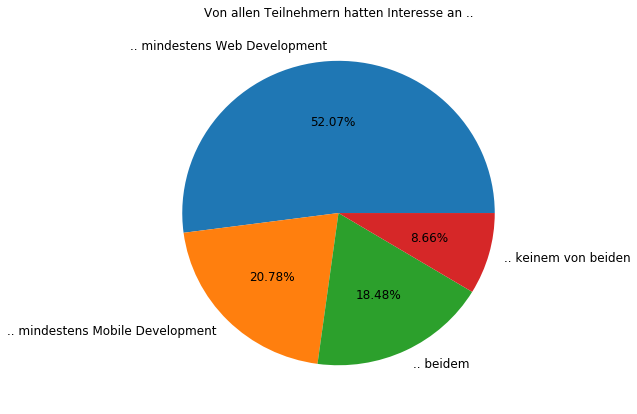

In [17]:
pie_data=[jri_web,jri_mobile,jri_both,jri_none]

%matplotlib inline

plt.figure(figsize=(7,7))
plt.pie(pie_data,autopct="%.2f%%",textprops={'fontsize': 12},labels=[".. mindestens Web Development",".. mindestens Mobile Development",".. beidem",".. keinem von beiden"])
plt.title("Von allen Teilnehmern hatten Interesse an ..")

plt.show()

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

To make sure you're working with a representative sample, drop all the rows where participants didn't answer what role they are interested in

In [18]:
data.dropna(inplace=True, subset=["JobRoleInterest"])

In [19]:
data.shape

(6992, 136)

Dies hat über 7000 Rows aus dem Datensatz entfernt. Dies entspricht den oben ermittelten ~62% NaN Antworten.

In [20]:
data["CountryLive"].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Nicaragua                      1
Liberia                        1
Aruba                          1
Vanuatu                        1
Jordan                         1
Name: CountryLive, Length: 137, dtype: int64

In [21]:
data["CountryLive"].value_counts(normalize=True)

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
                              ...   
Nicaragua                   0.000146
Liberia                     0.000146
Aruba                       0.000146
Vanuatu                     0.000146
Jordan                      0.000146
Name: CountryLive, Length: 137, dtype: float64

Der mit Abstand größte Markt stellen die vereinigten Staaten dar. Mit deutlichem Abstand folgen Indien (~1/6), Großbritannien und Kanada. Sinnvolle Märkte, insbesondere durch die hohe Anzahl englischsprachiger Teilnehmer. Dies sagt allerdings noch nichts darüber aus, ob auch diese Teilnehmer zu unserer potenziellen Zielgruppe gehören (Web & Mobile Development)

 We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.
 
Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

In [22]:
data["MonthsProgramming"].dtype

dtype('float64')

In [23]:
data.loc[(data["MonthsProgramming"]==1)|(data["MonthsProgramming"]==0),"MonthsProgramming"].value_counts()

1.0    767
0.0    235
Name: MonthsProgramming, dtype: int64

In [24]:
data["MonthsProgramming"].replace(to_replace=0, value=1, inplace=True)

In [25]:
data.loc[data["MonthsProgramming"]==1,"MonthsProgramming"].value_counts()

1.0    1002
Name: MonthsProgramming, dtype: int64

In [26]:
data["SpendPerMonth"]=data["MoneyForLearning"]/data["MonthsProgramming"]

675 Teilnehmer haben keinen Wert in dieser Spalte. Für die weitere Analyse werden diese entfernt.

In [27]:
data.dropna(subset=["SpendPerMonth"],inplace=True)

In [28]:
data["SpendPerMonth"].isnull().sum()

0

In [29]:
data["CountryLive"].isnull().sum()

105

In [30]:
data.dropna(subset=["CountryLive"],inplace=True)
data["CountryLive"].isnull().sum()

0

In [31]:
data[["CountryLive","SpendPerMonth"]].groupby(by="CountryLive").mean().loc[["United States of America","India","United Kingdom","Canada"]]

,SpendPerMonth
CountryLive,
United States of America,227.997996
India,135.100982
United Kingdom,45.534443
Canada,113.510961


In [32]:
data[["CountryLive","SpendPerMonth"]].groupby(by="CountryLive").median().loc[["United States of America","India","United Kingdom","Canada"]]

,SpendPerMonth
CountryLive,
United States of America,3.333333
India,0.000000
United Kingdom,0.000000
Canada,0.000000


Die Ergebnisse fallen sehr unterschiedlich aus. Die Ausgaben sind bei Teilnehmern aus den USA im Mittelwert deutlich höher als bei allen anderen Teilnehmern. Außerdem sind die Ausgaben für Indien kontraintuitiv hoch und für Großbritannien niedrig. Die Verteilung des Medians zeigt, dass die Verteilung der Ausgaben wohl äußerst rechtssteil ist. Deshalb besitzt der Mittelwert nur eine dürftige Aussagekraft

In [33]:
data.loc[data["CountryLive"].isin(["United States of America","India","United Kingdom","Canada"]),["CountryLive","SpendPerMonth"]]

,CountryLive,SpendPerMonth
1,United States of America,13.333333
2,United States of America,200.000000
6,United Kingdom,0.000000
15,United States of America,0.000000
16,United States of America,16.666667
...,...,...
18107,India,275.000000
18111,India,200.000000
18113,United States of America,0.000000
18130,United States of America,0.000000


In [34]:
data["SpendPerMonth"].value_counts(dropna=False)

0.000000        3040
50.000000        123
25.000000        119
16.666667        117
100.000000       117
                ... 
3.076923           1
10.833333          1
30000.000000       1
312.500000         1
611.111111         1
Name: SpendPerMonth, Length: 488, dtype: int64

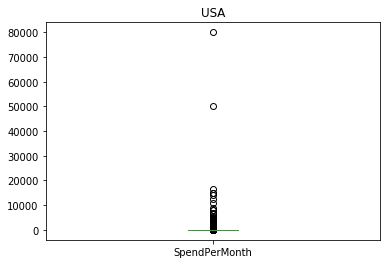

In [35]:
data.loc[data["CountryLive"]=="United States of America","SpendPerMonth"].plot.box(title="USA")

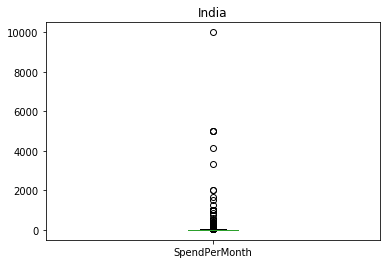

In [36]:
data.loc[data["CountryLive"]=="India","SpendPerMonth"].plot.box(title="India")

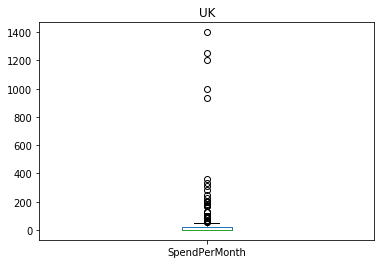

In [37]:
data.loc[data["CountryLive"]=="United Kingdom","SpendPerMonth"].plot.box(title="UK")

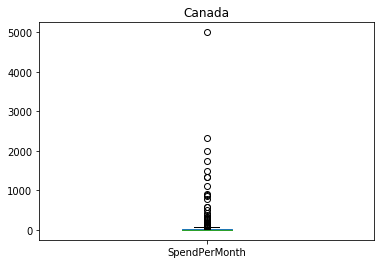

In [38]:
data.loc[data["CountryLive"]=="Canada","SpendPerMonth"].plot.box(title="Canada")

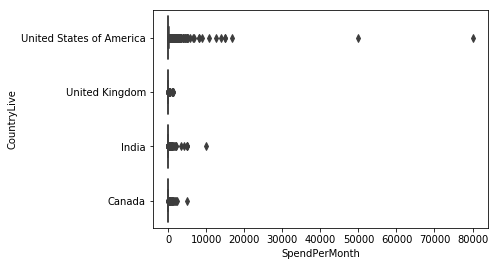

In [39]:
import seaborn as sns

sns.boxplot(x="SpendPerMonth", y="CountryLive", data=data[data["CountryLive"].str.contains(
    'United States of America|India|United Kingdom|Canada')])

Zahlreiche Ausreiserwerte, belegen die vermutete rechtssteilheit der Verteilung. Insbesondere für die USA, aber auch Indien hat im Vergleich viele Ausreißer. Zuerst werden die Extremwerte entfernt um ihren Einfluss herauszurechnen.

In [40]:
data=data[data["SpendPerMonth"]<20000]

In [41]:
data[["CountryLive","SpendPerMonth"]].groupby(by="CountryLive").mean().loc[["United States of America","India","United Kingdom","Canada"]]

,SpendPerMonth
CountryLive,
United States of America,183.800110
India,135.100982
United Kingdom,45.534443
Canada,113.510961


Der Durchschnitt in den USA hat sich verringert. Dennoch sind die Durchschnittsausgaben in Indien überraschend hoch.

In [42]:
indian_extreme_spenders=data.loc[(data["CountryLive"]=="India")&(data["SpendPerMonth"]>3000)]

In [43]:
indian_extreme_spenders

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpendPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


Zumindest kann man die Ausgaben nicht darauf beziehen, dass ein bestimmtes Bootcamp besucht worden ist

In [44]:
us_extreme_spenders=data.loc[(data["CountryLive"]=="United States of America")&(data["SpendPerMonth"]>3000)]

In [45]:
us_extreme_spenders

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,SpendPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
723,22.0,1.0,1.0,0.0,Dev Bootcamp,0.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2432,37.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3250.000000
2480,35.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4250.000000
3144,24.0,1.0,0.0,0.0,Hackbright Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4000.000000
3145,34.0,1.0,0.0,0.0,Hackbright Academy,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5666.666667
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3260,33.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333


In [46]:
us_extreme_spenders[us_extreme_spenders["AttendedBootcamp"]==1].shape[0]/us_extreme_spenders.shape[0]

0.5882352941176471

Bei den us-amerikanischen Ausreißern haben zumindest knapp 60% ein Bootcamp besucht.

Es werden nun alle Werte über 5000 entfernt um zumindest die gröbsten Ausreißer herauszurechnen. Es muss an dieser Stelle klar sein, dass dies eine grobe Bestimmung ist und gewählt wurde, um den Datenverlust gering zu halten.

In [47]:
data=data[data["SpendPerMonth"]<5000]

In [48]:
data[["CountryLive","SpendPerMonth"]].groupby(by="CountryLive").mean().loc[["United States of America","India","United Kingdom","Canada"]]

,SpendPerMonth
CountryLive,
United States of America,130.639017
India,81.812102
United Kingdom,45.534443
Canada,93.065400


Ausgehend von diesen Daten soll die Frage beantwortet werden, wieviele wirkliche potenzielle Kunden haben diese Länder. Es wurde bereits eine Einschränkung nach den Herkunftsländern der Interessenten gemacht, eine Sprache konnte bestimmt werden und es wurde eine grobe Aufstellung vorgenommen, in welchen Ländern im Durchschnitt am meisten gezahlt werden würde.

Dies soll nun anhand eines konkreten Abo-Modelles überprüft werden von 59$ pro Monat. Wieviele Kunden wären bereit diesen Betrag zu bezahlen

In [49]:
target_countries=data[data["CountryLive"].isin(["United States of America","India","United Kingdom","Canada"])]

In [50]:
target_countries["CountryLive"].unique()

array(['United States of America', 'United Kingdom', 'India', 'Canada'],
      dtype=object)

In [51]:
target_countries["Over59"]=target_countries["SpendPerMonth"]>=59

C:\Users\Acedia23\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
target_countries[["CountryLive","Over59"]].groupby(by="CountryLive").mean()

,Over59
CountryLive,
Canada,0.163180
India,0.154684
United Kingdom,0.154122
United States of America,0.221078


Dieser Wert ist besonders interessant, da er den Ausreißer-Einfluss minimiert und diejenige herausrechnet, die nichts bereit sind für die Weiterbildung zu bezahlen.

Hier zeigt sich, dass mit Abstand am meisten Teilnehmer aus den USA mindestens 59$ pro Monat in der Vergangenheit ausgegeben haben. Dies ist ein weitere Hinweis darauf, dass die USA der wichtigste Markt für die Werbe-Kampagne darstellt.

Die anderen drei Länder befinden sich in etwa auf ähnlichem Niveau. Es zeigt sich auch, dass Indien und das Vereinigte Königreich sich bei dieser Betrachtung annähern und nicht mehr unterscheidbar sind.

In [58]:
target_countries[target_countries["Over59"]==True]["CountryLive"].value_counts(normalize=True)

United States of America    0.808030
India                       0.089084
United Kingdom              0.053952
Canada                      0.048934
Name: CountryLive, dtype: float64

- Es macht prinzipiell Sinn in allen Ländern zu werben
- Die zwei besten Märkte sind die USA und Indien (dort sind die Durchschnittsausgaben etwas kleiner als in Kanda, allerdings scheint das Interesse größer zu sein --> potenziell größerer Markt).
- Kanada ist aufgrund der Ausgabe-Bereitschaft auch ein interessanter Markt, allerdings weniger vertreten. Das Vereinigte Königreich bestichtmit vergleichsweise wenigen Interessenten und niedrige Durchschnittsausgaben.
- Es macht Sinn das Werbe-Budget stärker auf die USA zu konzentrieren, da die Bereitschaft 59 Dollar auszugeben größer ist (Im Schnitt sogar ~130 Dollar) und auch das Interesse an den beiden Themen besonders groß zu sein scheint (sie machen immerhin ~75% des verbleibenden Datensatzes aus)
- Auch Werbung nur in den USA könnte man aufgrund der Daten vertreten (siehe oben)
- Eine konkrete Entscheidung sollte trotzdem in Zusammenarbeit mit der Marketing-Abteilung entstehen.